至于 OpenCV 为什么不是人民群众喜闻乐见的 RGB，这是历史遗留问题，在 OpenCV 刚开始研发的年代，BGR 是相机设备厂商的主流表示方法，虽然后来 RGB 成了主流和默认，但是这个底层的顺序却保留下来了，事实上 Windows 下的最常见格式之一 bmp，底层字节的存储顺序还是 BGR。OpenCV 的这个特殊之处还是需要注意的，比如在 Python 中，图像都是用 numpy 的 array 表示，但是同样的 array 在 OpenCV 中的显示效果和 matplotlib 中的显示效果就会不一样。下面的简单代码就可以生成两种表示方式：

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 图6-1中的矩阵
img = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]],
], dtype=np.uint8)

# 用matplotlib存储
plt.imsave('img_pyplot.jpg', img)

# 用OpenCV存储
cv2.imwrite('img_cv2.jpg', img)

True

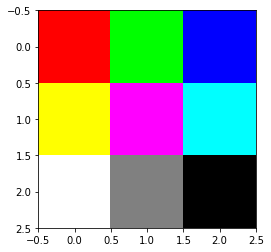

In [4]:
img = plt.imread('img_pyplot.jpg')
plt.imshow(img)

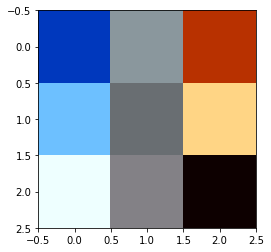

In [5]:
img = plt.imread('img_cv2.jpg')
plt.imshow(img)

# 基本图像处理

## 存取图像

读图像用 `cv2.imread()`，可以按照不同模式读取，一般最常用到的是读取单通道灰度图，或者直接默认读取多通道。存图像用 `cv2.imwrite()`，注意存的时候是没有单通道这一说的，根据保存文件名的后缀和当前的 array 维度，OpenCV 自动判断存的通道，另外压缩格式还可以指定存储质量，来看代码例子：

In [ ]:
import cv2

# 读取一张400x600分辨率的图像
color_img = cv2.imread('test_400x600.jpg')
print(color_img.shape)

# 直接读取单通道
gray_img = cv2.imread('test_400x600.jpg', cv2.IMREAD_GRAYSCALE)
print(gray_img.shape)

# 把单通道图片保存后，再读取，仍然是3通道，相当于把单通道值复制到3个通道保存
cv2.imwrite('test_grayscale.jpg', gray_img)
reload_grayscale = cv2.imread('test_grayscale.jpg')
print(reload_grayscale.shape)

# cv2.IMWRITE_JPEG_QUALITY指定jpg质量，范围0到100，默认95，越高画质越好，文件越大
cv2.imwrite('test_imwrite.jpg', color_img, (cv2.IMWRITE_JPEG_QUALITY, 80))

# cv2.IMWRITE_PNG_COMPRESSION指定png质量，范围0到9，默认3，越高文件越小，画质越差
cv2.imwrite('test_imwrite.png', color_img, (cv2.IMWRITE_PNG_COMPRESSION, 5))